In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from random import randint

In [2]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
day_dict = {'sun':1, 'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6, 'sat':7}

In [3]:
dataset = pd.read_csv('forestfires.csv')

for i in range(len(dataset.month)):
    dataset.month[i]= month_dict[dataset.month[i]]
    
for i in range(len(dataset.day)):
    dataset.day[i]= day_dict[dataset.day[i]]

dataset.head()

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [44]:
y = dataset['area']
x = dataset.drop(['area'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.05)

In [83]:
MLP = MLPRegressor(hidden_layer_sizes=(3,3),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MSE: 4129.729007613299


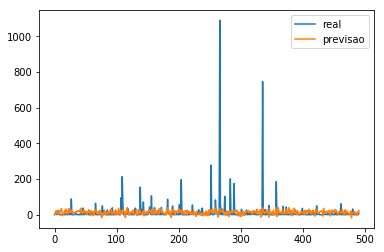

In [84]:
pred = MLP.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

MSE: 179.16408175291832


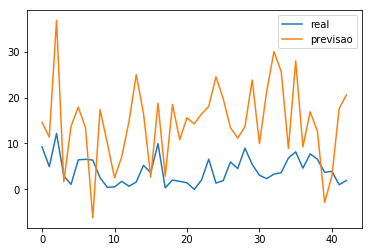

In [211]:
pred = MLP.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

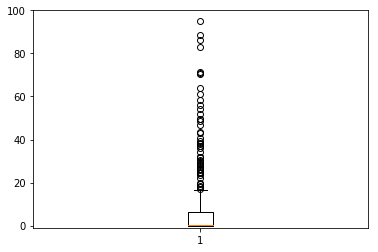

In [201]:
plt.boxplot(list(dataset.area))
plt.axis([0,2,-1, 100])
plt.show()

In [198]:
outliers = dataset[dataset.area >15]
drop_list = []
for i in outliers.index:
    drop_list.append(i)
    
outliers = dataset[dataset.area==0]
random_pos = []
for i in range(int(len(outliers)-10)):
    pos = randint(0, len(outliers)-1)
    while pos in random_pos:
        pos = randint(0, len(outliers)-1)
    random_pos.append(pos)
    drop_list.append(outliers.index[pos])

new_dataset = dataset.drop(drop_list, axis = 0)

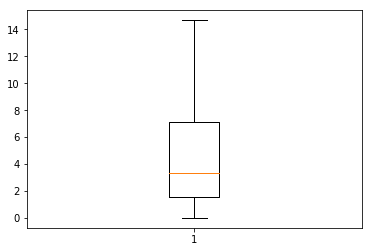

In [199]:
plt.boxplot(list(new_dataset.area))
plt.show()

In [200]:
MLP1 = MLPRegressor(hidden_layer_sizes=(3,3),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')

y = new_dataset['area']
x = new_dataset.drop(['area'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

MLP1.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MSE: 15.002076808262721


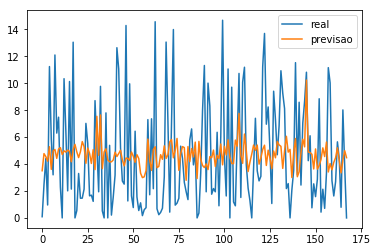

In [212]:
pred = MLP1.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

MSE: 9.36284933862866


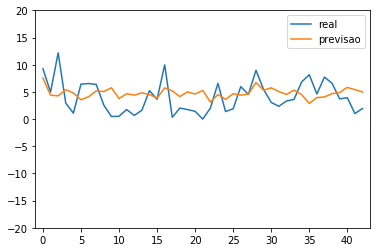

In [220]:
pred = MLP1.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.axis([-1,43,-20, 20])
plt.legend()
plt.show()

In [34]:
from math import ceil

m=[]
interval = 10
lim = ceil(dataset['area'].max())+interval
for i in range(interval,lim,interval):
    x = dataset['area'][dataset['area']>i-interval]
    y=[]
    for j in x:
        if j<i:
            y.append(j)
    m.append(y)
# Imprime a quantidade de exemplos para cada 10 unidades de área 
for i in range(len(m)):
    print((i+1)*interval, '-', len(m[i]))

10 - 175
20 - 36
30 - 16
40 - 12
50 - 7
60 - 4
70 - 2
80 - 3
90 - 3
100 - 1
110 - 2
120 - 0
130 - 0
140 - 0
150 - 0
160 - 1
170 - 0
180 - 1
190 - 1
200 - 1
210 - 1
220 - 1
230 - 0
240 - 0
250 - 0
260 - 0
270 - 0
280 - 1
290 - 0
300 - 0
310 - 0
320 - 0
330 - 0
340 - 0
350 - 0
360 - 0
370 - 0
380 - 0
390 - 0
400 - 0
410 - 0
420 - 0
430 - 0
440 - 0
450 - 0
460 - 0
470 - 0
480 - 0
490 - 0
500 - 0
510 - 0
520 - 0
530 - 0
540 - 0
550 - 0
560 - 0
570 - 0
580 - 0
590 - 0
600 - 0
610 - 0
620 - 0
630 - 0
640 - 0
650 - 0
660 - 0
670 - 0
680 - 0
690 - 0
700 - 0
710 - 0
720 - 0
730 - 0
740 - 0
750 - 1
760 - 0
770 - 0
780 - 0
790 - 0
800 - 0
810 - 0
820 - 0
830 - 0
840 - 0
850 - 0
860 - 0
870 - 0
880 - 0
890 - 0
900 - 0
910 - 0
920 - 0
930 - 0
940 - 0
950 - 0
960 - 0
970 - 0
980 - 0
990 - 0
1000 - 0
1010 - 0
1020 - 0
1030 - 0
1040 - 0
1050 - 0
1060 - 0
1070 - 0
1080 - 0
1090 - 0
1100 - 1
